<a href="https://colab.research.google.com/github/SudhaMsr/Python-Projects/blob/main/Object_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## importing the libraries and packages 
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
import keras

In [ ]:
#loading data set and splitting
#training should be -80% and testing-20%
# total images-60000 with 32x32 pixels
(X_train,y_train), (X_test,y_test)= tf.keras.datasets.cifar10.load_data()

In [ ]:
print('Training Images: {}'.format(X_train.shape))
print('Testing Images: {}'.format(X_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [ ]:
print(X_train[0].shape)

(32, 32, 3)


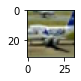

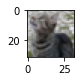

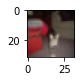

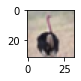

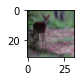

In [ ]:
for i in range(332,337):
    plt.subplot(120+ 1 + i)
    img=X_train[i]
    plt.imshow(img)
    plt.show()

In [ ]:
## preprocessing the data
X_train= X_train.reshape(X_train.shape[0],32,32,3)
X_test= X_test.reshape(X_test.shape[0],32,32,3)
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

X_train /=255
X_test =X_test/255
n_classes =10

print("Shape before one-hot encoding: ", y_train.shape)
Y_train=np_utils.to_categorical(y_train,n_classes)
Y_test=np_utils.to_categorical(y_test,n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)


Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


In [ ]:
from keras.backend import dropout
##Building the model

from keras.models import Sequential
from keras.layers import Dense,Dropout,Conv2D,MaxPool2D,Flatten

model= Sequential()

#convolutional layers
model.add(Conv2D(50,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(75,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

#hidden layer
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250,activation='relu'))
model.add(Dropout(0.3))

#output layer
model.add(Dense(10,activation='softmax'))

#compiling
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

#traing the model
model.fit(X_train,Y_train,batch_size=128,epochs=10,validation_data=(X_test,Y_test))

Epoch 1/10
391/391 [==============================] - 540s 1s/step - loss: 2.3029 - accuracy: 0.0986 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 2/10
391/391 [==============================] - 548s 1s/step - loss: 2.3028 - accuracy: 0.0969 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
391/391 [==============================] - 535s 1s/step - loss: 2.3028 - accuracy: 0.0978 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
391/391 [==============================] - 535s 1s/step - loss: 2.3027 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
391/391 [==============================] - 533s 1s/step - loss: 2.3027 - accuracy: 0.0985 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
391/391 [==============================] - 532s 1s/step - loss: 2.3027 - accuracy: 0.0954 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
391/391 [==============================] - 532s 1s/step - loss: 2.3027 - accuracy: 0.0983 - val_loss: 2.3026 - val_accuracy: 0.1000